In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#### O objetivo aqui é tentar achar alguma forma para reduzir a dimensionalidade

In [2]:
df_treinamento = pd.read_csv('../arquivos_csv/treinamento4.csv', low_memory=False)
df_teste = pd.read_csv('../arquivos_csv/teste4.csv', low_memory=False)

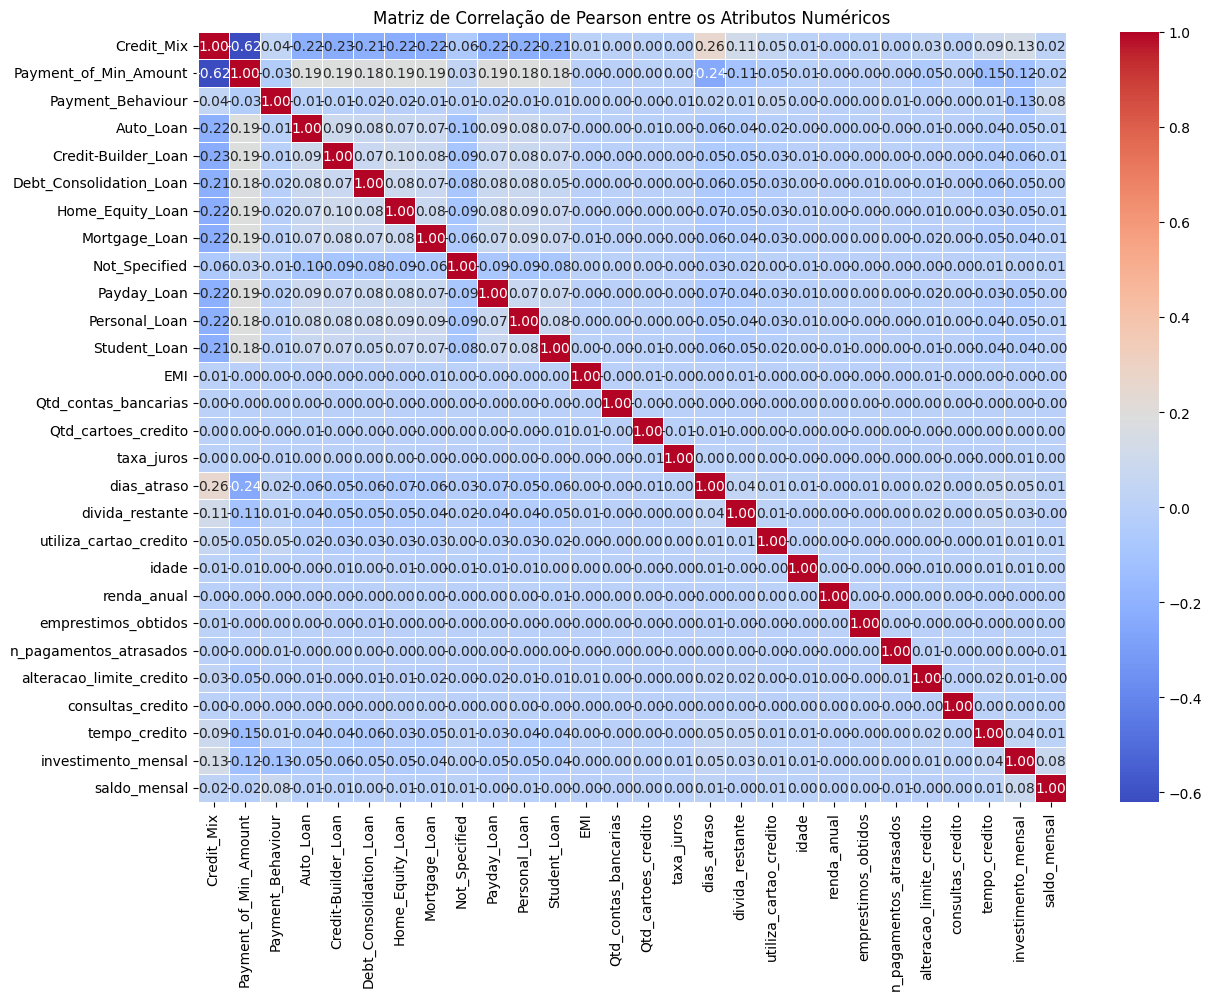

In [3]:
df_numerico = df_treinamento.select_dtypes(include=['float64', 'int64'])
correlacao = df_numerico.corr(method='pearson')
plt.figure(figsize=(14, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Pearson entre os Atributos Numéricos')
plt.show()

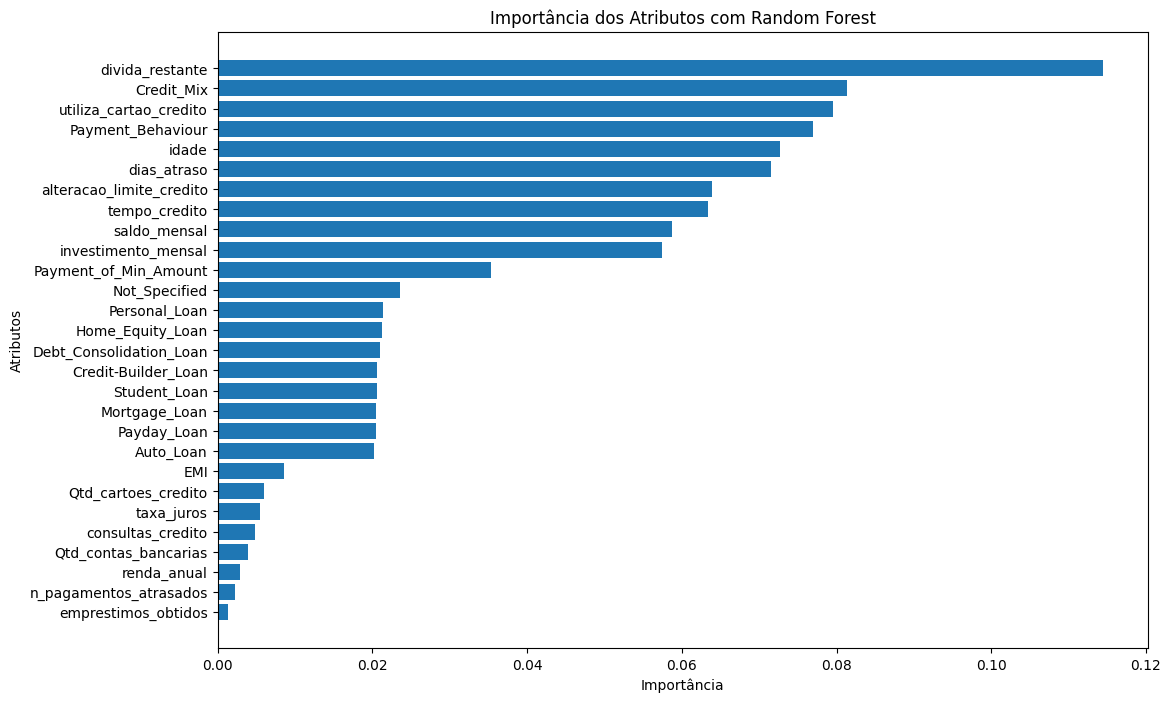

Atributos selecionados: []


In [4]:
X_train = df_treinamento.drop(columns=['Credit_Score'])  # Remova a coluna alvo
y_train = df_treinamento['Credit_Score']  # Defina a coluna alvo

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Obter a importância dos atributos
importancias = modelo_rf.feature_importances_
atributos = X_train.columns

importancias_df = pd.DataFrame({'Atributo': atributos, 'Importancia': importancias})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Plotar a importância dos atributos
plt.figure(figsize=(12, 8))
plt.barh(importancias_df['Atributo'], importancias_df['Importancia'])
plt.xlabel('Importância')
plt.ylabel('Atributos')
plt.title('Importância dos Atributos com Random Forest')
plt.gca().invert_yaxis()
plt.show()

threshold = 1  # Ajuste conforme necessário
atributos_importantes = importancias_df[importancias_df['Importancia'] > threshold]['Atributo'].tolist()

# Criar datasets reduzidos com os atributos selecionados
X_treinamento_reduzido = X_train[atributos_importantes]
X_teste_reduzido = df_teste[atributos_importantes]  # Aplicar no dataset de teste também

print("Atributos selecionados:", atributos_importantes)

#### remover atributos com baixa relevancia

In [5]:
atributos_para_remover = [
    'EMI', 'Qtd_cartoes_credito', 'taxa_juros', 'consultas_credito', 
    'Qtd_contas_bancarias', 'renda_anual', 'n_pagamentos_atrasados', 'emprestimos_obtidos'
]

df_treinamento = df_treinamento.drop(columns=atributos_para_remover)
df_teste = df_teste.drop(columns=atributos_para_remover)

print("Atributos removidos com sucesso.")


Atributos removidos com sucesso.


#### Nova Correlação

In [ ]:
df_numerico = df_treinamento.select_dtypes(include=['float64', 'int64'])
correlacao = df_numerico.corr(method='pearson')
plt.figure(figsize=(14, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Pearson entre os Atributos Numéricos')
plt.show()

## Salvar Dados

In [ ]:

df_treinamento.to_csv('../arquivos_csv/treinamento4.csv', index=False)
df_teste.to_csv('../arquivos_csv/teste4.csv', index=False)